In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = 'Instagram data.csv'
df = pd.read_csv(file_path, encoding='latin-1')

In [5]:
df.shape

(119, 13)

In [6]:
df

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [3]:
print(df.isnull().sum()) 

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


In [4]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [5]:
def tipo_variables(df):
    dtypes = df.dtypes
    categorical_cols = []
    numerical_cols = []
    for col, dtype in dtypes.items():
        if pd.api.types.is_numeric_dtype(dtype):
            numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    return numerical_cols, categorical_cols
    
vbles = tipo_variables(df)
num_vbles =vbles[0]
cat_vbles = vbles[1]

print(cat_vbles)
print(num_vbles)

['Caption', 'Hashtags']
['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']


In [6]:
def plot_numerical(df):
    numerical_cols=tipo_variables(df)[0]
    a= math.floor(math.sqrt(len(numerical_cols)))+1
    fig, axes = plt.subplots(a, a, figsize=(25,25))
    axes = axes.flatten()
    i = 0
    for t in numerical_cols:
        ax = sns.histplot(data=df, x=t, bins=20,  ax=axes[i])
        i +=1
    plt.show()
def plot_numericalBox(df):
    import math
    import scipy.stats as stats
    
    #a= math.floor(math.sqrt(len(num_vbles)))+1
    num_vbles=tipo_variables(df)[0]
    fig, axes = plt.subplots(math.floor(len(num_vbles)/3)+1,3, figsize=(25,25))
    axes = axes.flatten()
    i = 0
    for i, t in enumerate(num_vbles):
        transformed_data, _ = stats.boxcox(df[t] + 1)  # Se suma 1 para evitar valores negativos/cero
        sns.boxplot(y=transformed_data, ax=axes[i])  # Boxplot en orientación vertical
        axes[i].set_title(f"Box-Cox de {t}")
    plt.tight_layout()
    plt.show()

def plot_categorial(df):
    categorical_cols=tipo_variables(df)[1]
    a= math.floor(math.sqrt(len(categorical_cols)))+1
    #fig, axes = plt.subplots(a, a, figsize=(25,25))
    fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(20,160))
    axes = axes.flatten()
    i = 0
    for t in categorical_cols:
        ax = sns.countplot(x=t, data=df, ax=axes[i])
        i +=1
    plt.show()

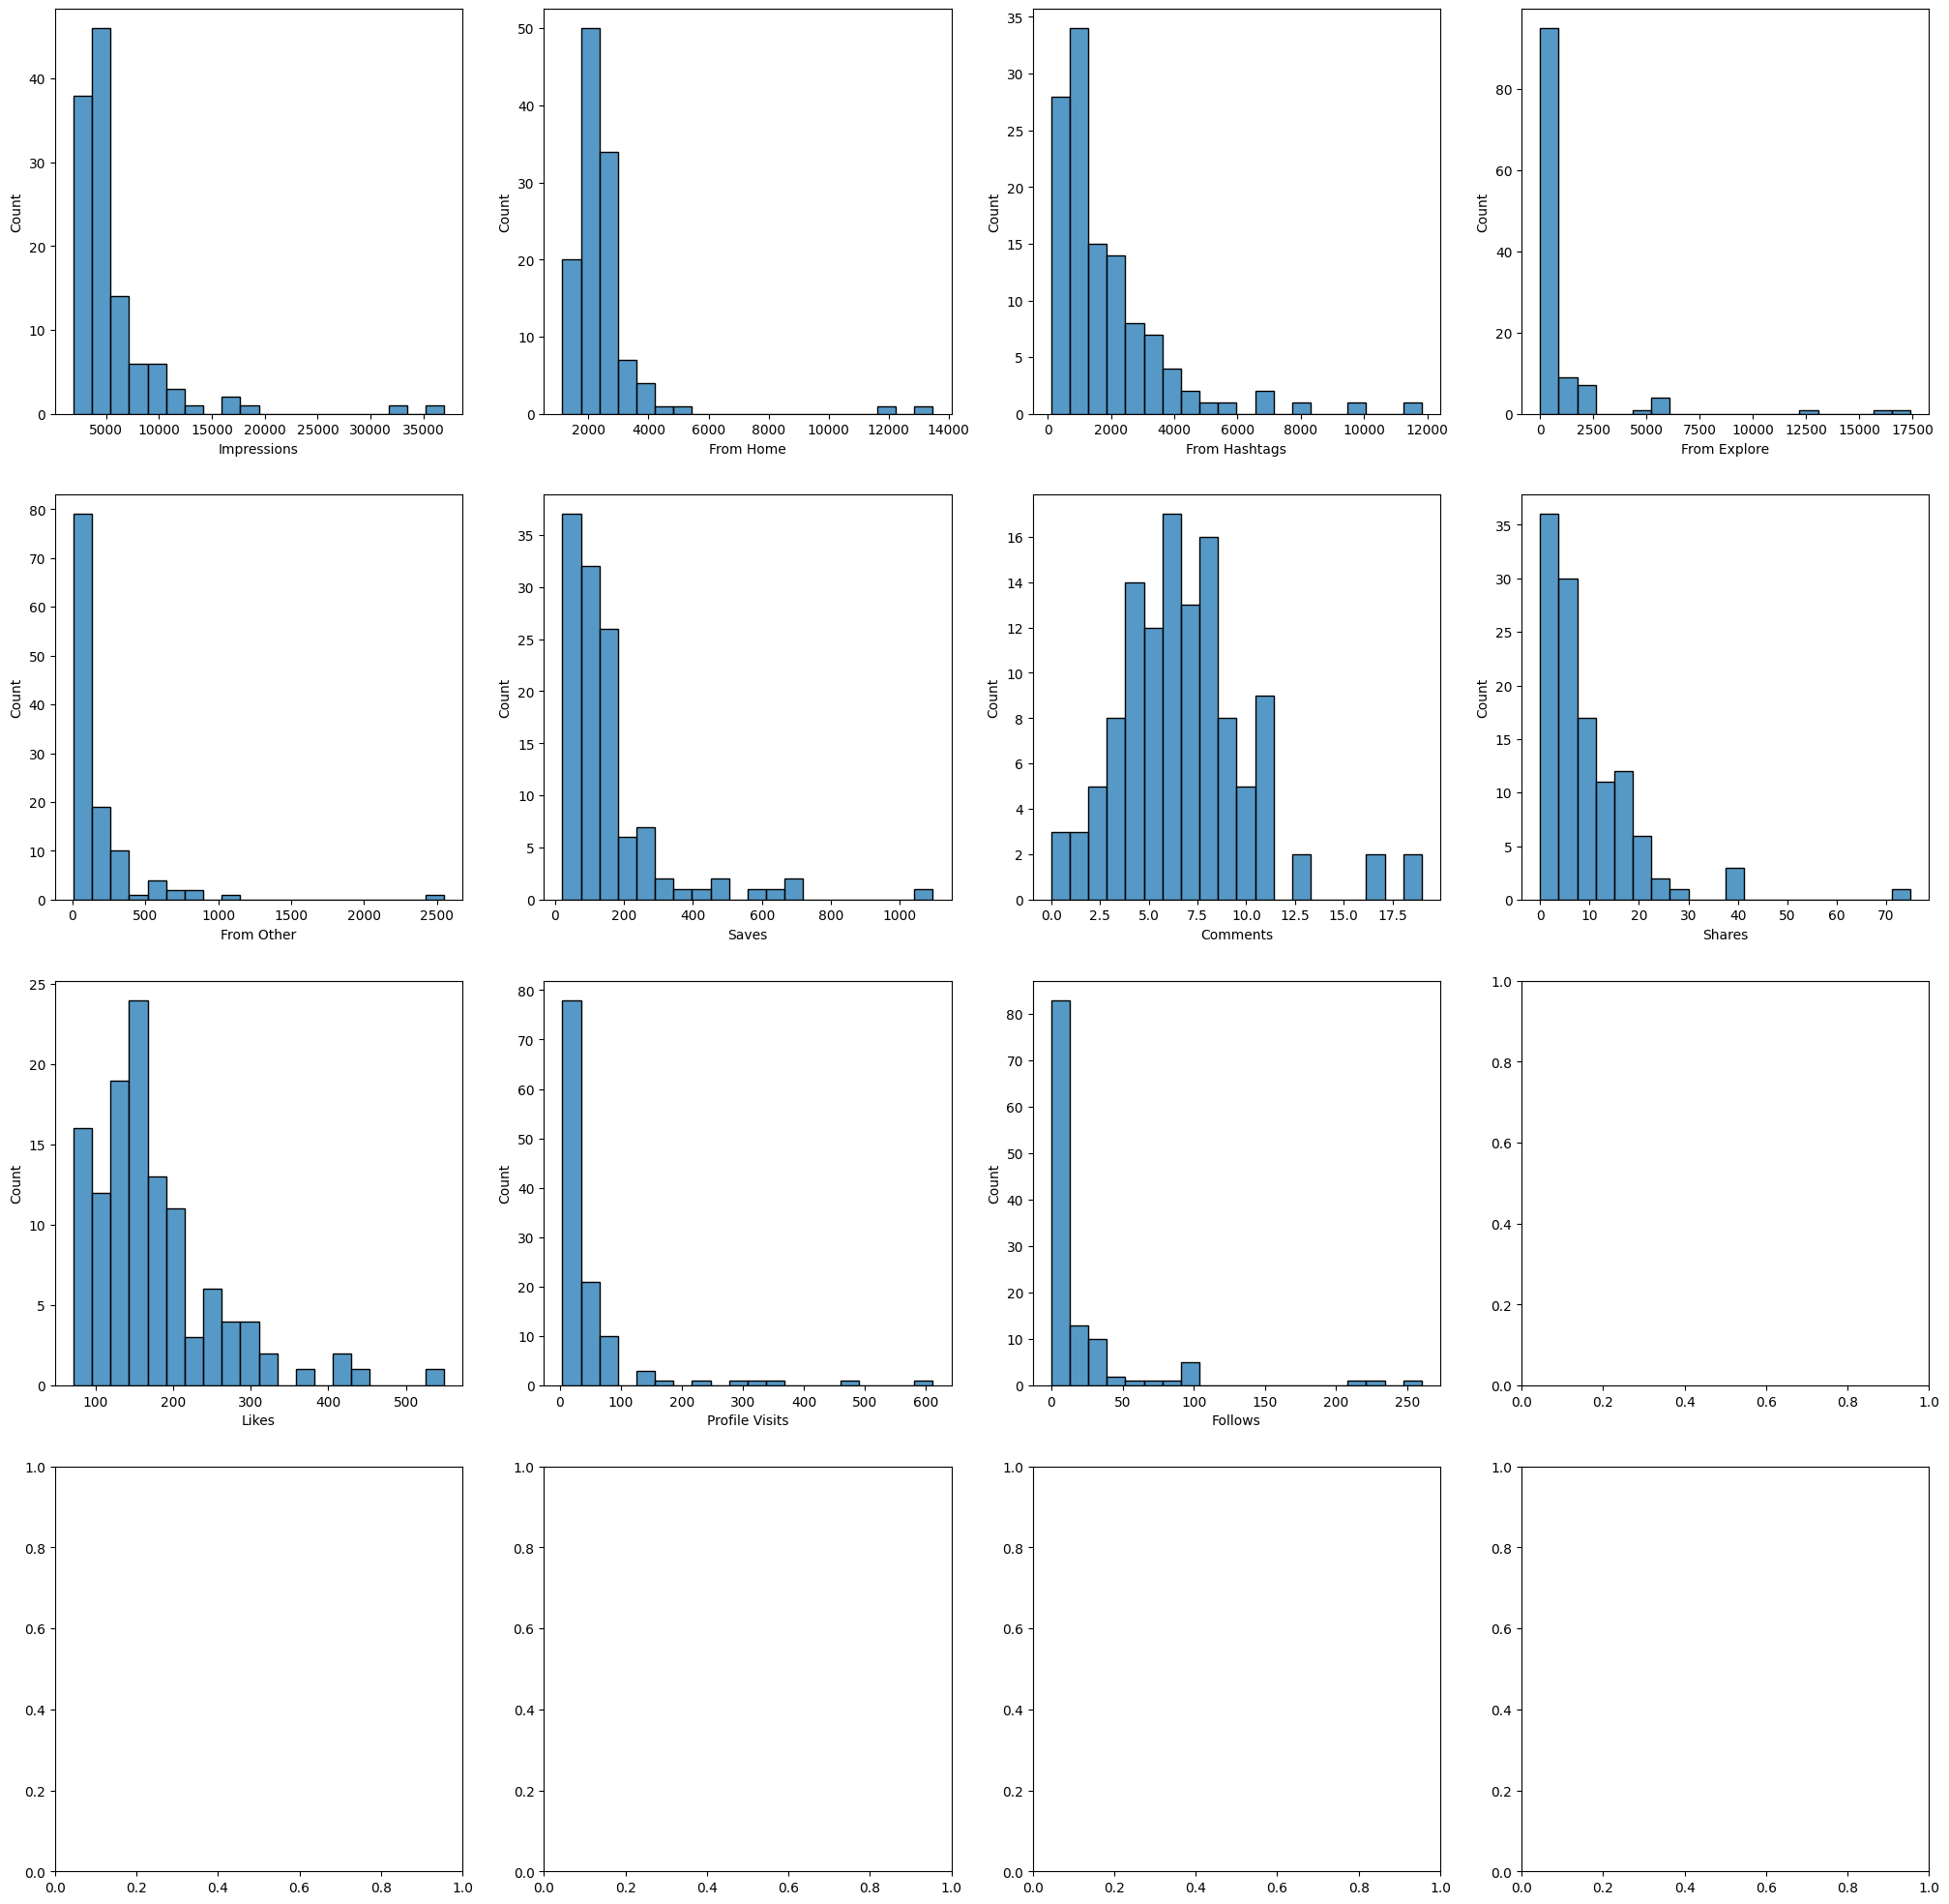

In [7]:
plot_numerical(df)

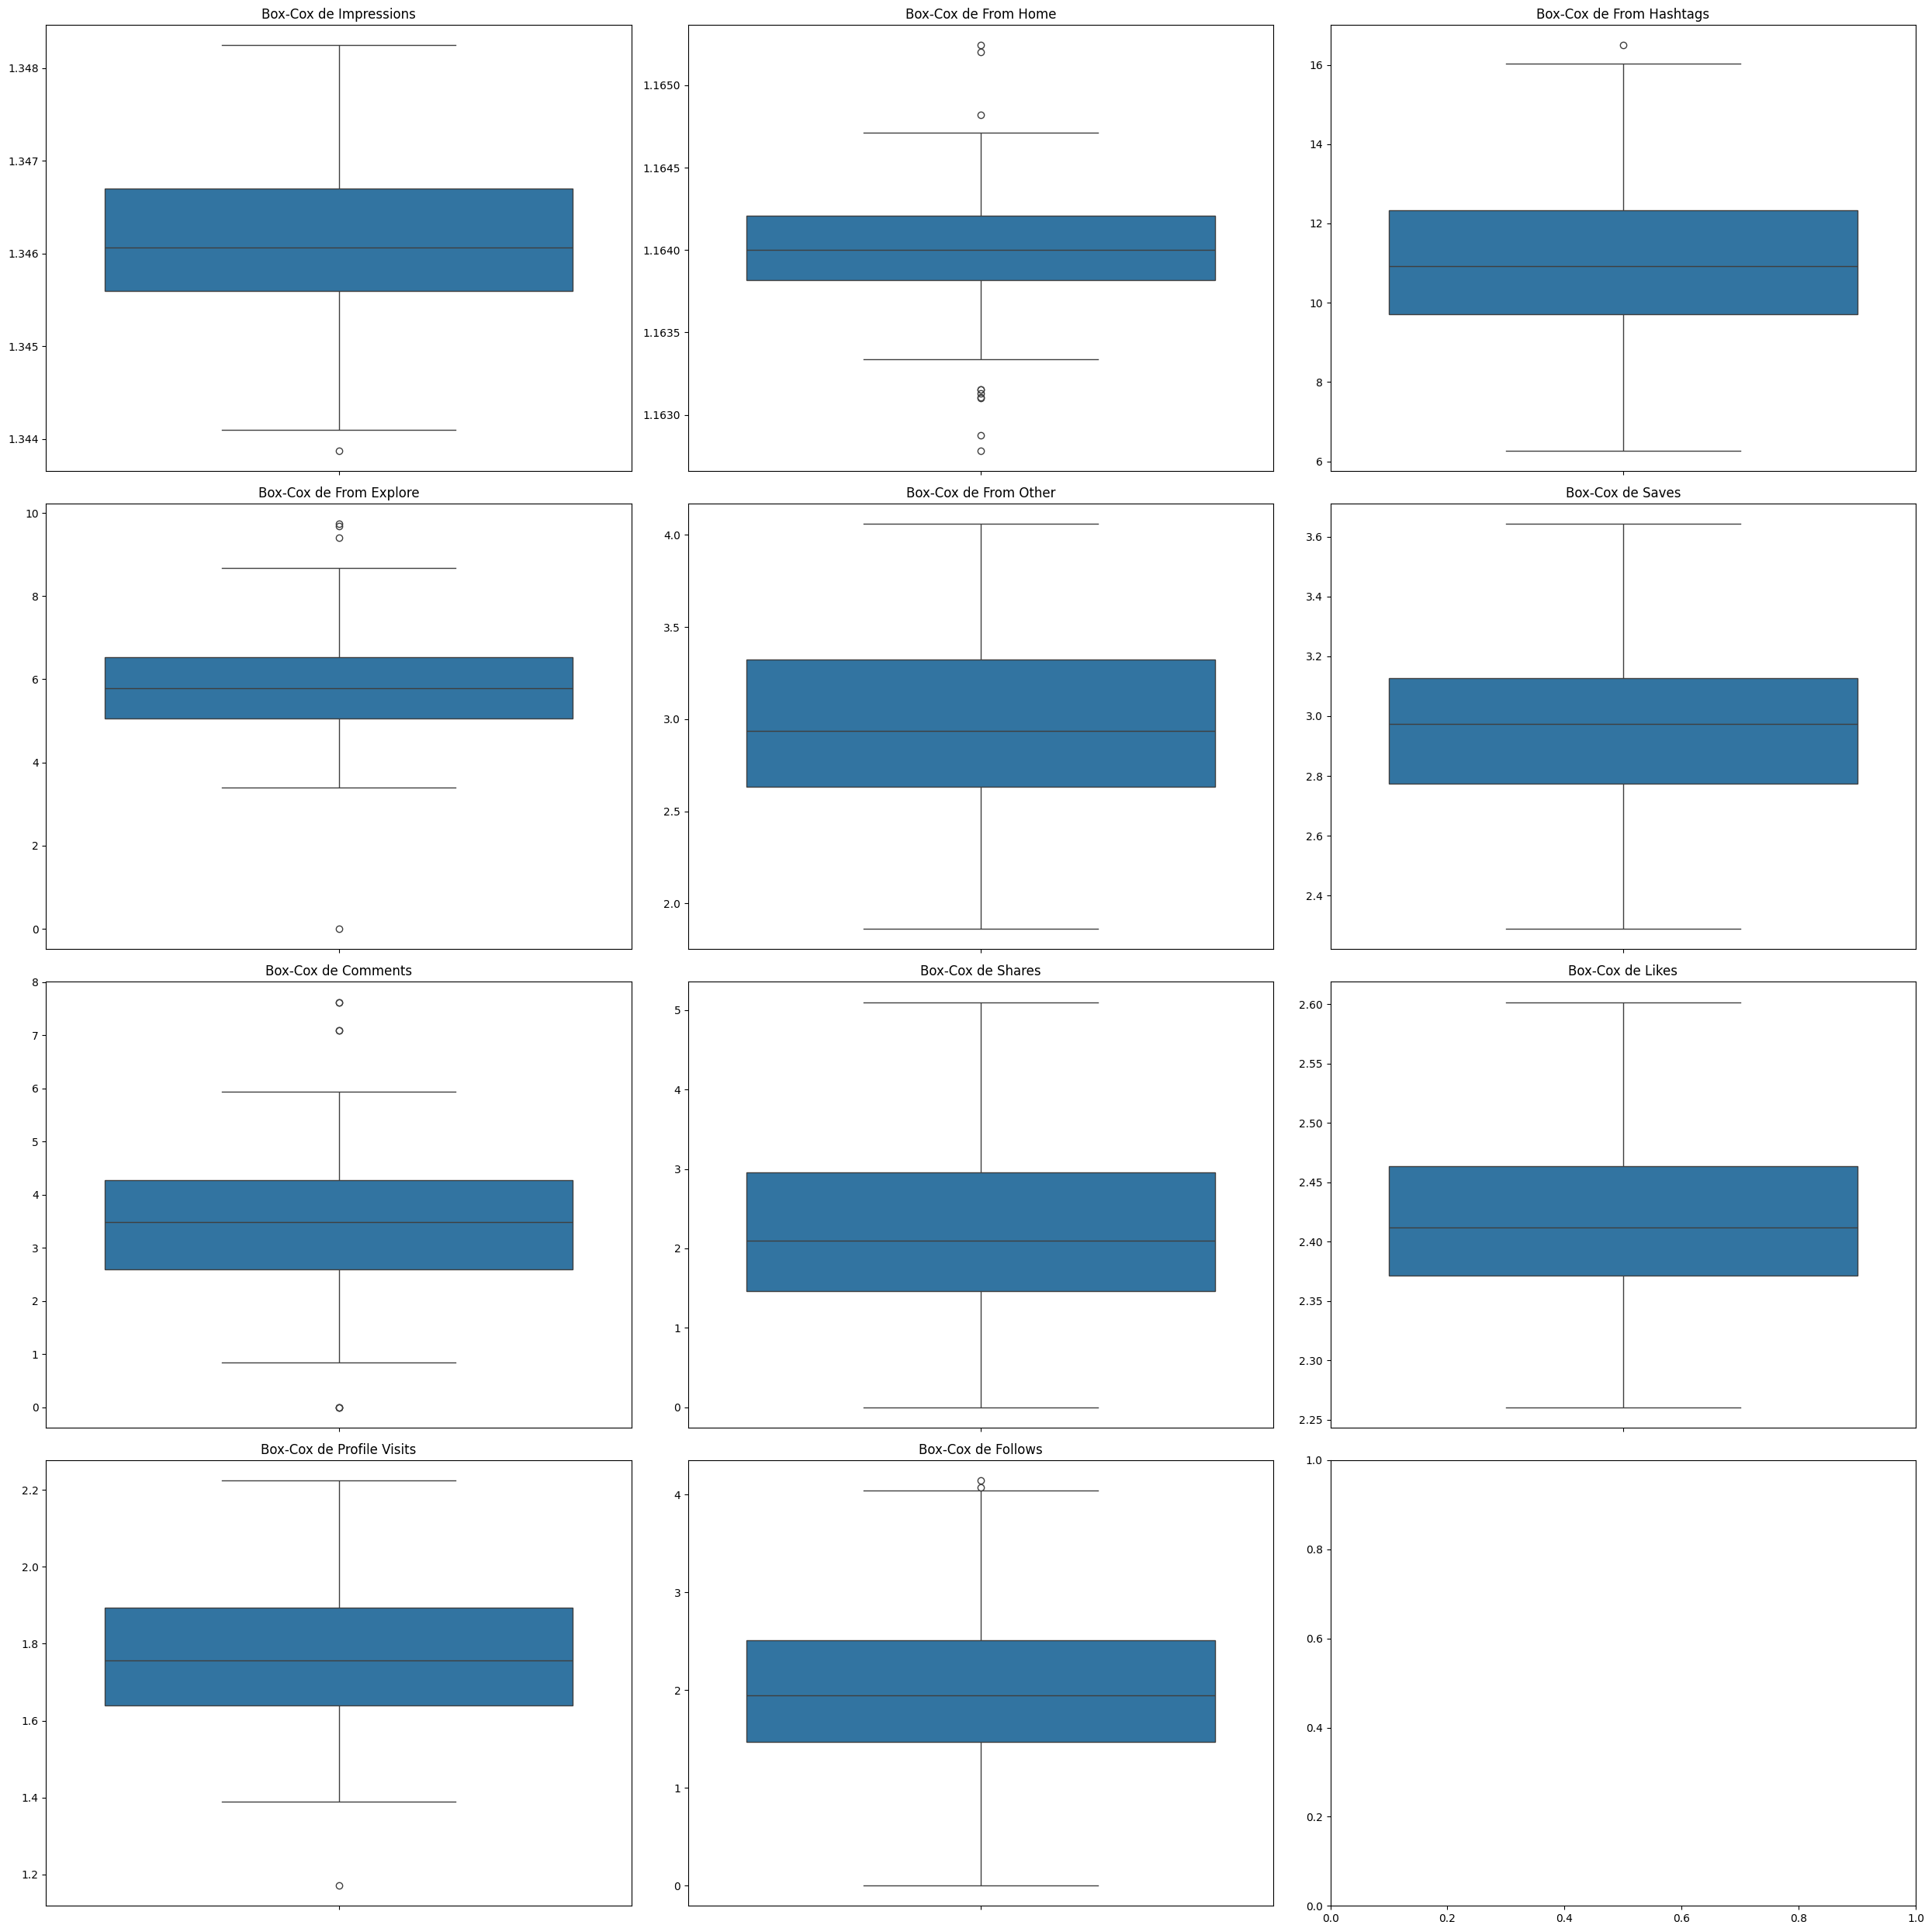

In [8]:
plot_numericalBox(df)

In [9]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def limpiar_texto(texto):
    texto = texto.replace("\n", " ")  # Eliminar saltos de línea
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    stop_words = set(stopwords.words('english'))
    texto = " ".join(word for word in texto.split() if word not in stop_words)  # Eliminar stopwords
    return texto

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df['hashtags_clean']= [limpiar_texto(hashtag) for hashtag in df['Hashtags']]
df['hashtags_clean']   

0      finance money business investing investment tr...
1      healthcare health covid data datascience dataa...
2      data datascience dataanalysis dataanalytics da...
3      python pythonprogramming pythonprojects python...
4      datavisualization datascience data dataanalyti...
                             ...                        
114    datascience datasciencejobs datasciencetrainin...
115    machinelearning machinelearningalgorithms data...
116    machinelearning machinelearningalgorithms data...
117    datascience datasciencejobs datasciencetrainin...
118    python pythonprogramming pythonprojects python...
Name: hashtags_clean, Length: 119, dtype: object

In [48]:
df

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,hashtags_clean
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,finance money business investing investment tr...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,healthcare health covid data datascience dataa...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,data datascience dataanalysis dataanalytics da...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,python pythonprogramming pythonprojects python...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,datavisualization datascience data dataanalyti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...,datascience datasciencejobs datasciencetrainin...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...,machinelearning machinelearningalgorithms data...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...,machinelearning machinelearningalgorithms data...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...,datascience datasciencejobs datasciencetrainin...


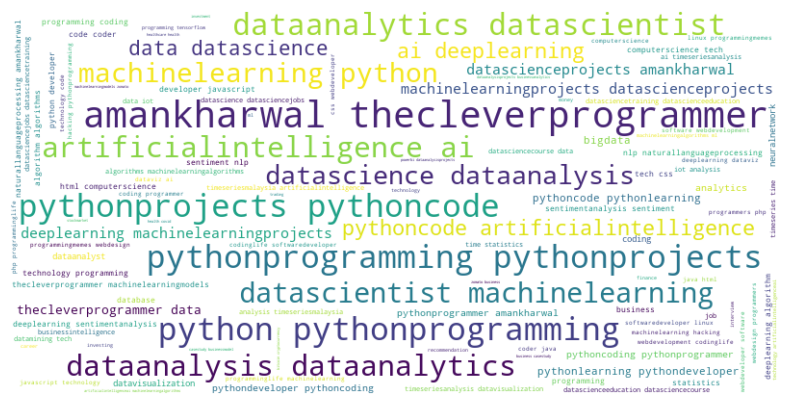

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convertir la columna en una sola cadena de texto
hashtags_text = " ".join(df["hashtags_clean"])

# Crear el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(hashtags_text)

# Graficar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [12]:
df['caption_clean']= [limpiar_texto(hashtag) for hashtag in df['Caption']]
df['caption_clean']  

0      important data visualizations every financial ...
1      best data science project ideas healthcare wan...
2      learn train machine learning model giving inpu...
3      heres write python program detect whether sent...
4      plotting annotations visualizing data consider...
                             ...                        
114         best data science certifications choose 2022
115    clustering machine learning technique used cla...
116    clustering music genres task grouping music ba...
117         best data science certifications choose 2022
118    175 python projects source code solved explain...
Name: caption_clean, Length: 119, dtype: object

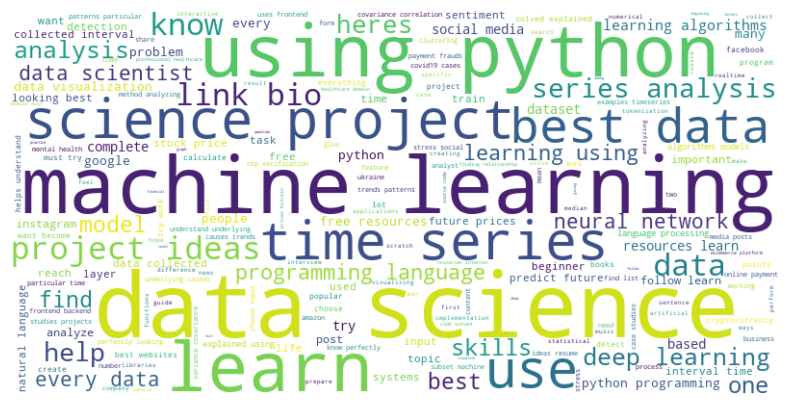

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convertir la columna en una sola cadena de texto
hashtags_text = " ".join(df["caption_clean"])

# Crear el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(hashtags_text)

# Graficar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
df["caption_clean"][1]

'best data science project ideas healthcare want become data science professional healthcare domain must try work projects'

In [15]:
# reinicia el kernerl despues de instalar gensim
from gensim.models import Word2Vec

hashtags_tokens = [text.split() for text in df["hashtags_clean"]]
caption_tokens = [text.split() for text in df["caption_clean"]]

# Entrenar modelo Word2Vec
model_hashtags = Word2Vec(hashtags_tokens, vector_size=100, window=5, min_count=1)
model_caption = Word2Vec(caption_tokens, vector_size=100, window=5, min_count=1)


In [20]:
import numpy as np

def obtener_vector_promedio(tokens, model):
    vectores = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectores, axis=0) if vectores else np.zeros(model.vector_size)

df["hashtags_vector"] = df["hashtags_clean"].apply(lambda x: obtener_vector_promedio(x.split(), model_hashtags))
df["caption_vector"] = df["caption_clean"].apply(lambda x: obtener_vector_promedio(x.split(), model_caption))


In [21]:
df["hashtags_vector"] 

0      [-0.0031800857, 0.010380482, 0.0031479506, -0....
1      [-0.0026296969, 0.01285392, 0.004515346, -0.00...
2      [-0.0036903983, 0.014044998, 0.0054885596, -0....
3      [-0.0026956361, 0.008815866, 0.006118137, -0.0...
4      [-0.0007066329, 0.012384769, 0.003997675, -0.0...
                             ...                        
114    [-0.0028926458, 0.0142840305, 0.004816345, -0....
115    [-0.0019425808, 0.0122346785, 0.0063057775, -0...
116    [-0.0019425808, 0.0122346785, 0.0063057775, -0...
117    [-0.0028926458, 0.0142840305, 0.004816345, -0....
118    [-0.0026956361, 0.008815866, 0.006118137, -0.0...
Name: hashtags_vector, Length: 119, dtype: object

In [22]:
import numpy as np
df["features_vector"] = df.apply(lambda row: np.concatenate([row["hashtags_vector"], row["caption_vector"]]), axis=1)


In [23]:
df["features_vector"]

0      [-0.0031800857, 0.010380482, 0.0031479506, -0....
1      [-0.0026296969, 0.01285392, 0.004515346, -0.00...
2      [-0.0036903983, 0.014044998, 0.0054885596, -0....
3      [-0.0026956361, 0.008815866, 0.006118137, -0.0...
4      [-0.0007066329, 0.012384769, 0.003997675, -0.0...
                             ...                        
114    [-0.0028926458, 0.0142840305, 0.004816345, -0....
115    [-0.0019425808, 0.0122346785, 0.0063057775, -0...
116    [-0.0019425808, 0.0122346785, 0.0063057775, -0...
117    [-0.0028926458, 0.0142840305, 0.004816345, -0....
118    [-0.0026956361, 0.008815866, 0.006118137, -0.0...
Name: features_vector, Length: 119, dtype: object

In [24]:
X = np.array(df["features_vector"].tolist())  # Convierte la columna en una matriz NumPy
print(X.shape)  # Verifica la dimensión del vector de características

(119, 200)


In [25]:
X

array([[-3.18008568e-03,  1.03804823e-02,  3.14795063e-03, ...,
        -4.22897143e-03,  8.70745862e-05,  3.75728030e-03],
       [-2.62969686e-03,  1.28539205e-02,  4.51534614e-03, ...,
        -1.78376085e-03,  2.09956407e-03, -2.13574478e-03],
       [-3.69039830e-03,  1.40449982e-02,  5.48855960e-03, ...,
        -2.99732503e-03, -2.24388350e-04,  2.03926489e-03],
       ...,
       [-1.94258080e-03,  1.22346785e-02,  6.30577747e-03, ...,
        -7.45813875e-03,  3.39990784e-03,  5.28459728e-04],
       [-2.89264577e-03,  1.42840305e-02,  4.81634494e-03, ...,
        -3.93398153e-03,  2.27722712e-03, -9.27280926e-04],
       [-2.69563613e-03,  8.81586596e-03,  6.11813692e-03, ...,
        -2.63133016e-03,  2.30800244e-03, -2.47084943e-04]], dtype=float32)

In [26]:
y=df['Likes']
y

0      162
1      224
2      131
3      213
4      123
      ... 
114    373
115    148
116     92
117    549
118    443
Name: Likes, Length: 119, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Raíz del error cuadrático medio

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 47.19
MSE: 5955.98
RMSE: 77.18


In [30]:
from sklearn.metrics import r2_score

# Calcular el R²
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2:.2f}")


R²: 0.46
